In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
# import packages

import sys

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.signal import savgol_filter


sys.path.append('../src')
from utilities import baseline_accuracy
from utilities import dataplotmelt
from utilities import test_model
from utilities import model_optimization
from utilities import train_model
from utilities import test_model
from utilities import variable_importance_df
from utilities import add_label_band
from utilities import montecarlo_crossvalidation


from preprocessing import baseline_gridsearch_SNV
from preprocessing import baseline_gridsearch
from preprocessing import baseline_gridsearch_RNV
from preprocessing import baseline_gridsearch_MSC

from preprocessing import prepo_results_windows
from preprocessing import final_df_preprocessing
from preprocessing import boxplot_preprocessing
from preprocessing import baseline_gridsearch_2

In [277]:
tsetse_data = pd.read_csv("../data/processed/TseTse_processed_wo_outliers.csv")


In [278]:
tsetse_females_thorax = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Thorax')]

tsetse_females_head = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Head')]

In [382]:
X_females_thorax = tsetse_females_thorax.loc[:,"1800":"600"]
X_females_head = tsetse_females_head.loc[:,"1800":"600"]

y_females_thorax = tsetse_females_thorax.loc[:,"Age"]
y_females_head = tsetse_females_head.loc[:,"Age"]

In [383]:
X_females_thorax.head()

,1800,1798,1796,1794,1792,1790,1788,1786,1784,1782,...,618,616,614,612,610,608,606,604,602,600
2,0.02081,0.02091,0.02111,0.02139,0.02154,0.02164,0.02181,0.02210,0.02243,0.02270,...,0.29401,0.29563,0.29708,0.29812,0.29867,0.29919,0.30034,0.30184,0.30339,0.30509
5,0.02161,0.02163,0.02163,0.02169,0.02168,0.02162,0.02162,0.02171,0.02181,0.02190,...,0.23665,0.23804,0.23935,0.24036,0.24116,0.24171,0.24200,0.24249,0.24366,0.24535
7,0.02286,0.02300,0.02321,0.02336,0.02332,0.02332,0.02347,0.02371,0.02387,0.02391,...,0.30526,0.30673,0.30806,0.30909,0.31012,0.31107,0.31184,0.31286,0.31430,0.31604
10,0.02189,0.02194,0.02205,0.02223,0.02225,0.02233,0.02254,0.02272,0.02281,0.02290,...,0.27012,0.27135,0.27248,0.27339,0.27384,0.27421,0.27493,0.27597,0.27720,0.27847
13,0.02473,0.02478,0.02481,0.02498,0.02506,0.02511,0.02519,0.02527,0.02532,0.02535,...,0.28437,0.28569,0.28698,0.28793,0.28849,0.28914,0.29001,0.29123,0.29285,0.29429


In [384]:
# Lower resolution
X_females_thorax_low = X_females_thorax[X_females_thorax.columns[::4]]

In [385]:
# Split train and test
Xf_th_train, Xf_th_test, yf_th_train, yf_th_test = train_test_split(X_females_thorax_low, y_females_thorax, test_size=0.2, shuffle=True, random_state=124,stratify=y_females_thorax)

Xf_hd_train, Xf_hd_test, yf_hd_train, yf_hd_test = train_test_split(X_females_head, y_females_head, test_size=0.2, shuffle=True, random_state=124, stratify=y_females_head)

In [386]:
yf_th_train.value_counts()

Age
3d    108
7w     93
5w     77
Name: count, dtype: int64

In [387]:
# Undersampling classes

from imblearn.under_sampling import RandomUnderSampler


under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(Xf_th_train, yf_th_train)

In [388]:
y_res.value_counts()

Age
3d    77
5w    77
7w    77
Name: count, dtype: int64

In [212]:
## preprocessing thorax

# define the windows for savgol smoothing
windows=[9,11,21]

In [259]:
# baseline gridsearch2 (no standard scaler, no LDA)

# raw

total_zero_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,0)
    total_zero_order.append(scores)

total_first_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,1)
    total_first_order.append(scores)

total_second_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,2)
    total_second_order.append(scores)



# SNV

snv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,0)
    snv_zero_order.append(scores)

snv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,1)
    snv_first_order.append(scores)

snv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,2)
    snv_second_order.append(scores)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for eac

In [260]:
# Join the results for each preprocessing
raw_results = prepo_results_windows(total_zero_order, total_first_order, total_second_order,"raw")
snv_results = prepo_results_windows(snv_zero_order , snv_first_order, snv_second_order,"snv" )

In [261]:
# concatenate all the preprocessing metdhos
dataframes = [raw_results, snv_results]
df_concat = pd.concat(dataframes)

In [262]:
# change column names, tranform to long format and export to csv
preprocesing_final_results = final_df_preprocessing(df_concat)

In [263]:
# Calculate the mean accuracy for each combination and print the best model
preprocessing_results_df = preprocesing_final_results.groupby(["Model", "Preprocessing","Derivative", "Window"])["Accuracy"].mean().reset_index()
bestmodel = preprocessing_results_df.loc[preprocessing_results_df["Accuracy"].idxmax()]
print("Best model is:\n", bestmodel)

Best model is:
 Model                  RF
Preprocessing         snv
Derivative              0
Window                 11
Accuracy         0.811429
Name: 82, dtype: object


In [264]:
preprocessing_results_df.sort_values(by="Accuracy")

,Model,Preprocessing,Derivative,Window,Accuracy
94,SGD,raw,1,11,0.350000
97,SGD,raw,2,11,0.355714
98,SGD,raw,2,21,0.364286
44,LR,raw,2,21,0.408571
93,SGD,raw,1,9,0.410000
...,...,...,...,...,...
46,LR,snv,0,11,0.801429
45,LR,snv,0,9,0.802857
47,LR,snv,0,21,0.805714
81,RF,snv,0,9,0.807143


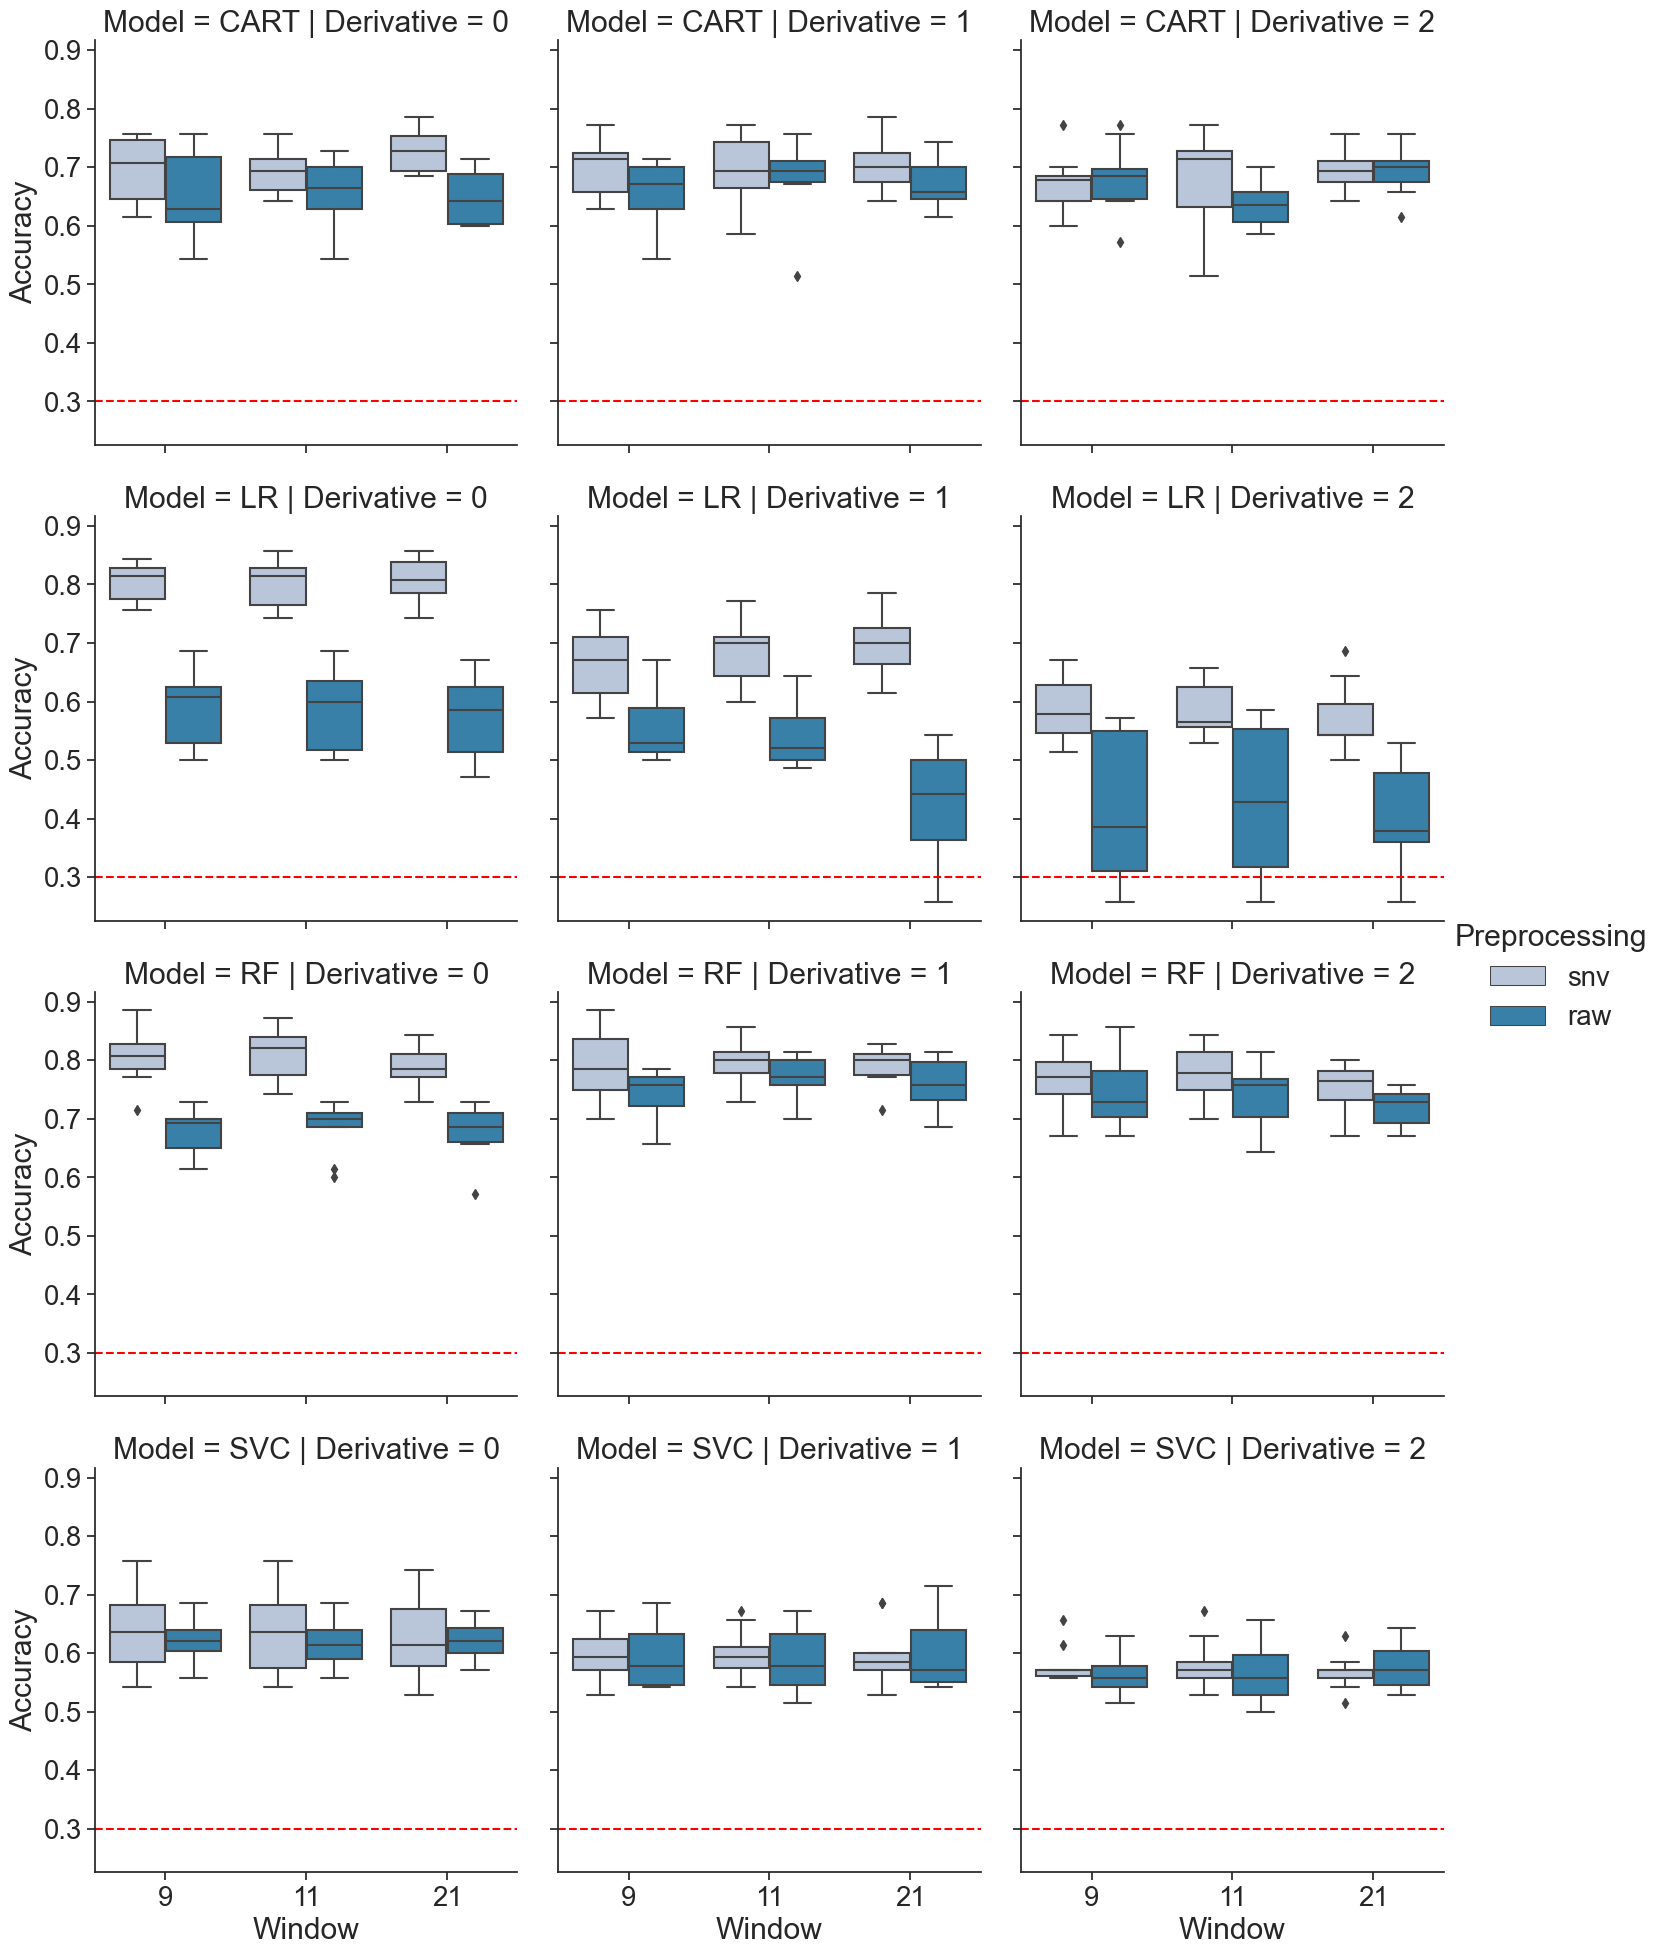

In [276]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['RF','SVC', 'LR', 'CART'])])
#plt.savefig("/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/results/plots/preprocesing.png", dpi=600)